In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from preprocessing_mud import get_valid_input_data, MUD_ROOT, traverse_and_draw, get_noisy_transformer

In [2]:
filtered_data = get_valid_input_data()

--- FILTERING VALID INPUT DATA ---


100%|██████████| 18115/18115 [00:09<00:00, 1849.52it/s]

11217 valid files.


Processing pinned example: 15683
alpha: 552, sigma: 20
✅ Pre-processing Concluded.


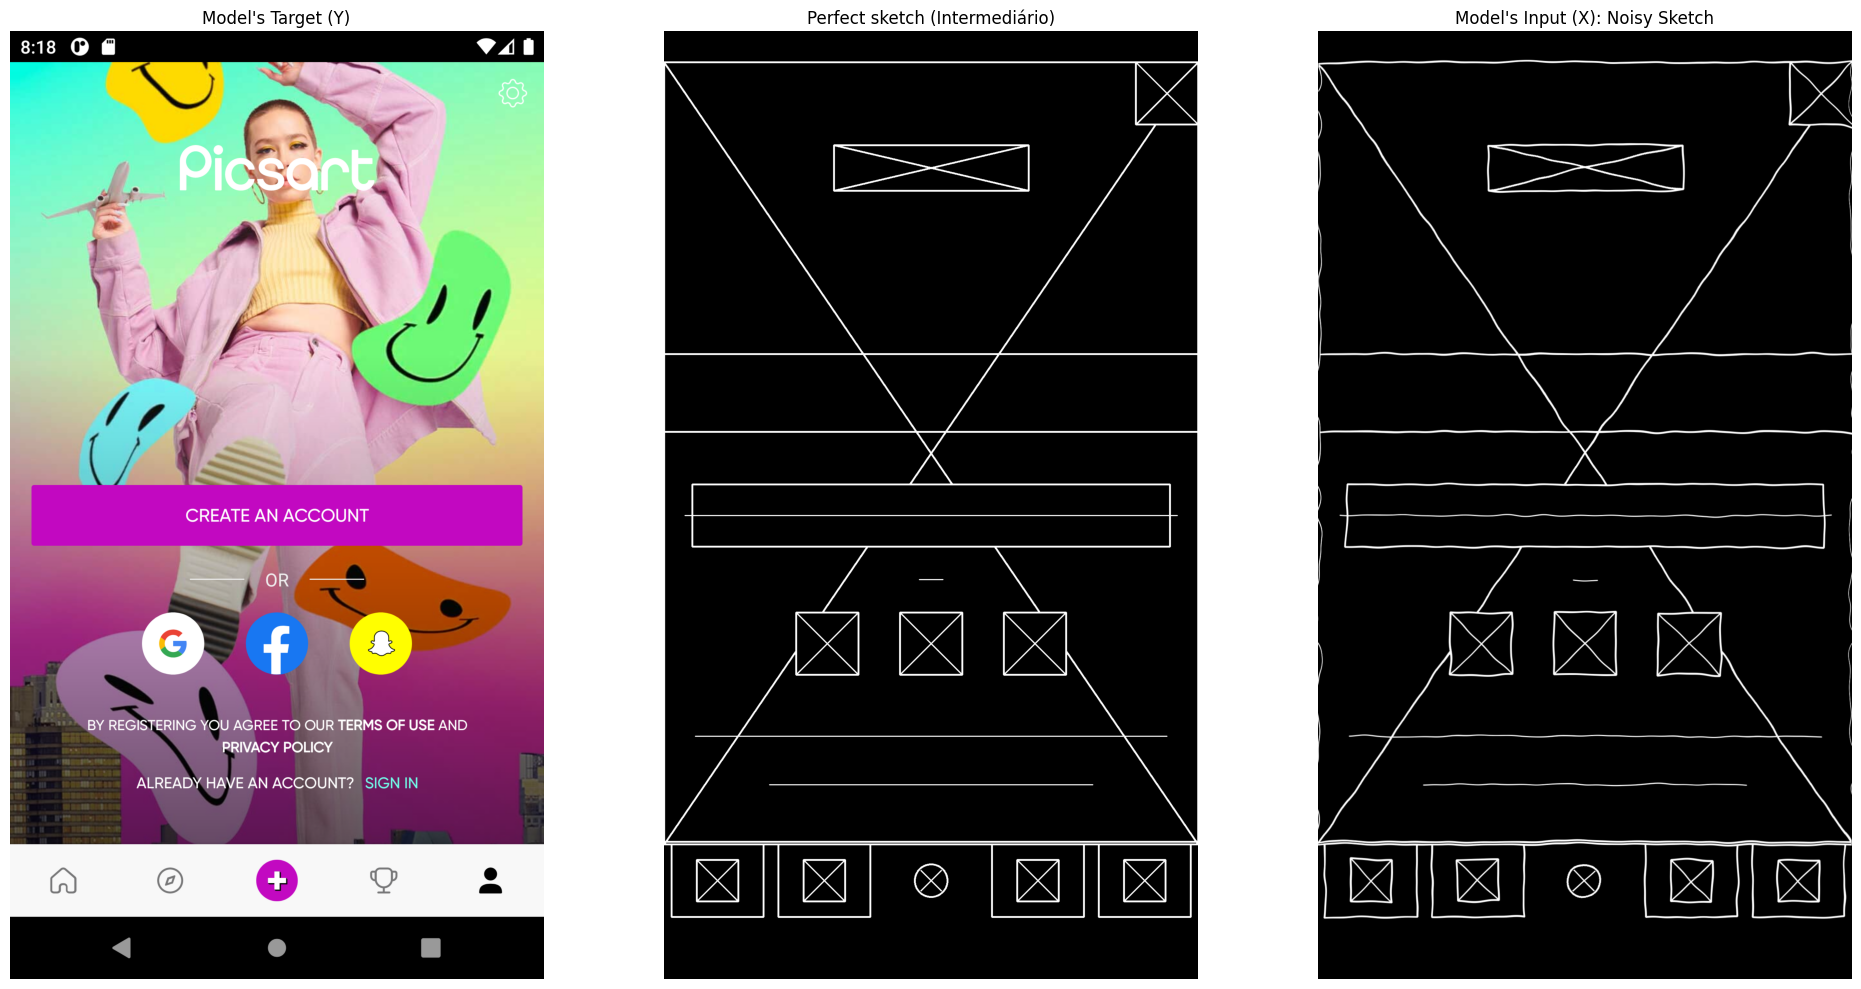

In [13]:
import random


example_id = "15683"

example = next((item for item in filtered_data if item["id"] == example_id), None)

real_ui_path = os.path.join(MUD_ROOT, f"{example_id}.png")

print(f"Processing pinned example: {example_id}")

if not example:
    print(f"ERROR: JSON {example_id} not found.")
else:
    try:
        real_image = cv2.imread(real_ui_path)
        real_image_rgb = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)

        sample_id = example['id']
        mud_data = example['data']
        
        # Dimensions from JSON
        width = int(mud_data.get('width', 1080))
        height = int(mud_data.get('height', 1920))
        
        # Create blank canvas (Black background)
        output_canvas = np.zeros((height, width, 3), dtype=np.uint8)
        
        views_list = mud_data['views']
        if views_list:
            traverse_and_draw(0, views_list, output_canvas)


        (alpha, sigma) = (random.randint(500, 600), random.randint(20, 35))
        print(f"alpha: {alpha}, sigma: {sigma}")
        transform_humanize = get_noisy_transformer(alpha, sigma)
        augmented = transform_humanize(image=output_canvas)
        processed_canvas = augmented['image']

        print("✅ Pre-processing Concluded.")

        fig, axes = plt.subplots(1, 3, figsize=(20, 10))

        axes[0].imshow(real_image_rgb)
        axes[0].set_title(f"Model's Target (Y)")
        axes[0].axis("off")

        axes[1].imshow(output_canvas)
        axes[1].set_title("Perfect sketch (Intermediário)")
        axes[1].axis("off")

        axes[2].imshow(processed_canvas)
        axes[2].set_title("Model's Input (X): Noisy Sketch")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Ocorreu um erro durante o processamento: {e}")